# **The office: Investigating some factors that could have influenced its popularity**

!['The office'](https://static.wixstatic.com/media/a33eeb_e0b0b0ac089a4a20b1c74e43dcbc0257~mv2.jpg/v1/fill/w_717,h_403,al_c,lg_1,q_90/a33eeb_e0b0b0ac089a4a20b1c74e43dcbc0257~mv2.webp)

**The office** is an American humoristic television series broadcast between March 24, 2005 and May 16, 2013.


In this project, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: **datasets/the_office_series.csv**, which was downloaded from Kaggle [here](https://www.kaggle.com/nehaprabhavalkar/the-office-dataset).


The dataset contains information on a variety of characteristics of each episode. In detail, these are:

* **Season:** Number of seasons.

* **EpisodeTitle:** Title of the episode.

* **About:** Description of the episode.

* **Ratings:** Ratings given to the episode.

* **Votes:** Votes given to the episode.

* **Viewership:** Number of viewers in USA (in millions).

* **Duration:** Duration in the number of minutes.

* **Date:** Date on which the episode was released.

* **GuestStars:** Guest stars appeared on that episode.

* **Director:** Names of directors.

* **Writers:** Names of writers.



## **Import librairies and read dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

office_df = pd.read_csv("datasets/the_office_series.csv")
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


First we import the library that we used during our study, then we will retrieve all of the data contained in the dataset to assign it to the **office_df** variable.

Once the data is retrieved in **office_df** we have tried to preview the data.

In view of the previous analysis we need to change the format of the **"Date"** column so that it is datetime, so only the **"GuestStars"** column has nullable values. 

In order to be able to use the **"GuestStars"** field we are going to create a little processing in our data.

## **Data Processing**

In [2]:
office_df['Date'] = pd.to_datetime(office_df['Date'])
print(office_df['Date'].dtype)

datetime64[ns]


First we change the **"Date"** column to **datetime64** more appropriate.

Now let's create a new **hasGuest** column which will be **True** if the **GuestStars** column is not empty.

In [3]:
office_df['hasGuest'] = list(map(lambda x: not x,  office_df['GuestStars'].isna()))
office_df['hasGuest'].head()

0    False
1    False
2    False
3    False
4    False
Name: hasGuest, dtype: bool

finally let's rename the column **"Unnamed: 0"** to **"episodeNumber"**

In [4]:
office_df = office_df.rename(columns = {'Unnamed: 0': 'episodeNumber'})
office_df.columns

Index(['episodeNumber', 'Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes',
       'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers',
       'hasGuest'],
      dtype='object')

## **Exploratory Data Analyse (EDA)**

In this part we will try to answer some questions

### **Can Guest Stars during an episode have an impact on the number of views?**

For this task we will again create a new column **"scaledRatings"** which is a scaling between **0** and **1** of the rating of each episode. This will allow us to assess the impact of this episode.

In [5]:
office_df['scaledRatings'] = office_df['Ratings'].apply(lambda x:(x -min(office_df['Ratings']))/(max(office_df['Ratings'])-min(office_df['Ratings'])))
office_df['scaledRatings'].head()

0    0.28125
1    0.53125
2    0.37500
3    0.46875
4    0.56250
Name: scaledRatings, dtype: float64

Now let's choose a color that reflects the scale for each episode.

In [6]:
colors = []

for _, row in office_df.iterrows():
    if row['scaledRatings'] < 0.25:
        colors.append('red')
    elif row['scaledRatings'] < .5:
        colors.append('orange')
    elif row['scaledRatings'] < .75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

colors[:5]

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen']

Then a size for each point following the fact that a **hasGuest** is **True**.

If **hasGuest** is **True** then the size will be **250** otherwise it will be **25**.

In [7]:
sizes = list(map(lambda x: 250 if x == True else 25, office_df['hasGuest']))
sizes[:5]

[25, 25, 25, 25, 25]

let's visualize what it gives.

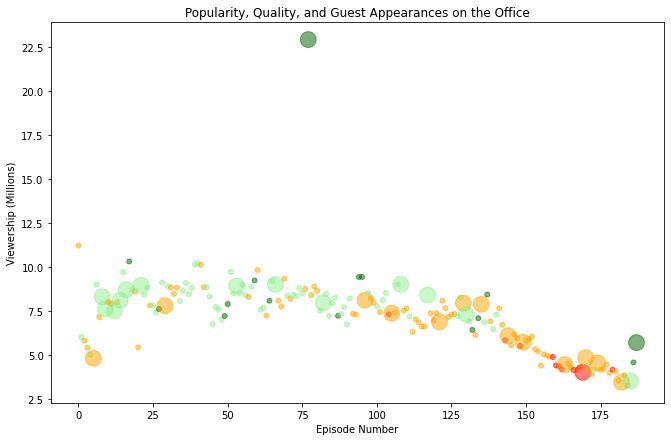

In [8]:
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=office_df['episodeNumber'], y=office_df['Viewership'], c=colors, s=sizes, alpha=.5)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

Looking at the point cloud we notice that only one point in episode really stands out from the others, in conclusion we can say that the presence of guest start in an episode does not improve its popularity.


But to be clear on this question we will look at a last chart.

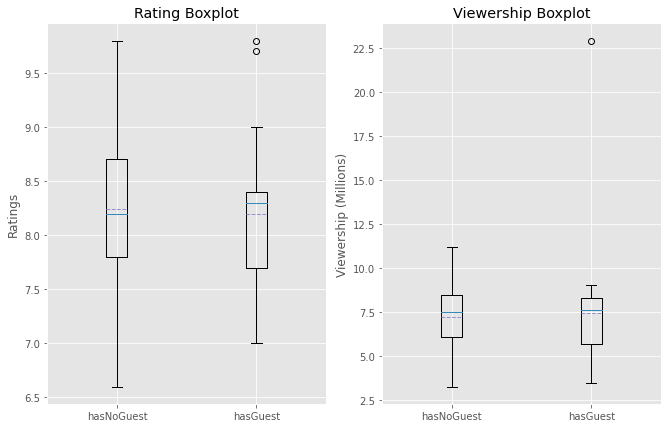

In [9]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2)

ax[0].boxplot([office_df[office_df['hasGuest'] == False]['Ratings'], office_df[office_df['hasGuest'] == True]['Ratings']],
                          showmeans = True,
                          meanline=True,
                          labels= ['hasNoGuest', 'hasGuest'] )
ax[0].set_title('Rating Boxplot')
ax[0].set_ylabel('Ratings')

ax[1].boxplot([office_df[office_df['hasGuest'] == False]['Viewership'], office_df[office_df['hasGuest'] == True]['Viewership']],
              showmeans = True,
              meanline=True,
              labels= ['hasNoGuest', 'hasGuest'])
ax[1].set_title('Viewership Boxplot')
ax[1].set_ylabel('Viewership (Millions)')

plt.show()

#### **Ratings**

Regarding the ratings we can say that the episodes with a guest star are slightly more appreciated by the spectators even if the average of the ratings is practically the same. 

Regarding the episodes with guest stars there are clearly **2** episodes that stand out. These have a score greater than **9**.

In [10]:
office_df[office_df['hasGuest'] == True][office_df['Ratings'] > 9]['EpisodeTitle']

77     Stress Relief
187           Finale
Name: EpisodeTitle, dtype: object

#### **Viewership**

Regarding the number of views we can we have the same average views and an episode that stands out as in the first chart.

In [11]:
office_df[office_df['hasGuest'] == True][office_df['Viewership'] > 20]['EpisodeTitle']

77    Stress Relief
Name: EpisodeTitle, dtype: object

On the whole we can say that the presence of a guest star did not particularly improve the popularity or the quality of the episodes except for one episode which comes back several times.

### **Is an episode more appreciated under the direction of a particular director ?**

To answer this question we will have to regroup the directors.

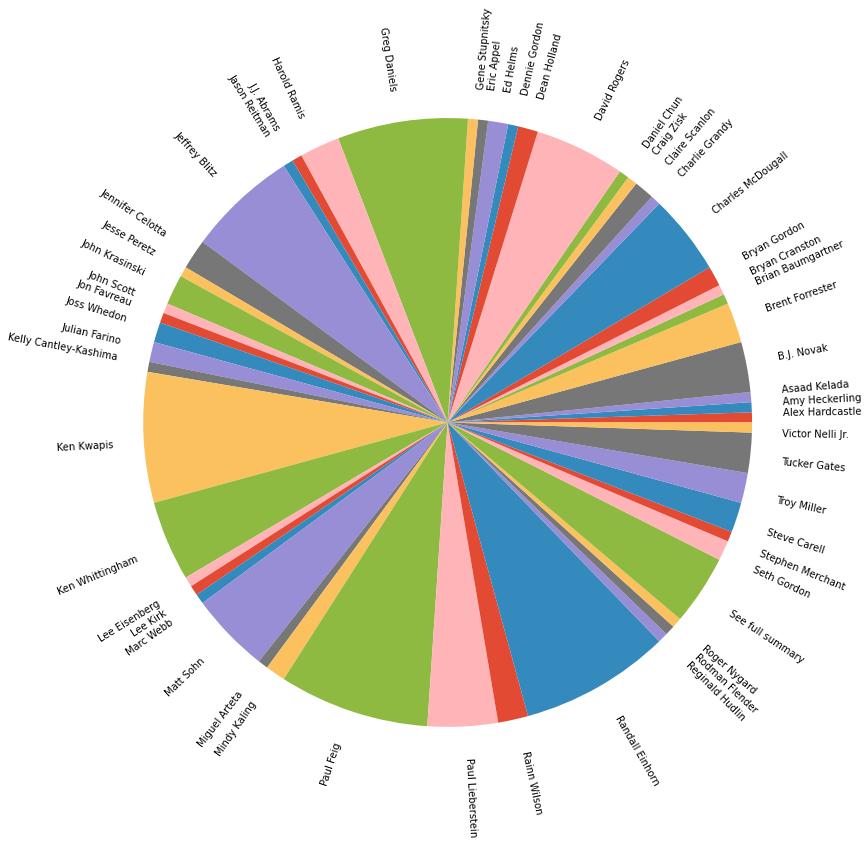

In [12]:
director_df = office_df.groupby('Director')['EpisodeTitle'].agg(['count'])

plt.pie(director_df['count'], labels=director_df.index, radius=2, rotatelabels=True, normalize=True)
plt.show()

as we can see, a number of directors have directed the series, we will be particularly interested in those who have a minimum of **10** appearances as a director of the series.

In [13]:
director_df = director_df[director_df['count'] > 10 ].sort_values('count', ascending=False)
director_df

,count
Director,
Paul Feig,15
Randall Einhorn,15
Greg Daniels,13
Ken Kwapis,13
Jeffrey Blitz,11


Let's add the average of the views to our data.

In [14]:
directorMean_df = office_df.groupby('Director')['Ratings'].agg(['mean'])
new_df = pd.merge(director_df, directorMean_df, left_index=True, right_index=True)
new_df.sort_values('mean', ascending=False)

,count,mean
Director,,
Paul Feig,15,8.753333
Ken Kwapis,13,8.607692
Greg Daniels,13,8.446154
Jeffrey Blitz,11,8.309091
Randall Einhorn,15,8.113333


**Paul Feig** and **Ken Kwapis** are rated higher by other directors. They obtained an average above **8.5** in the rating.

But if we look at looking at the number of people who watch the episodes on average, we have a turnaround.

In [15]:
viewer_df = office_df.groupby('Director')['Viewership'].agg(viewers='mean')
new_df = pd.merge(director_df, viewer_df, left_index=True, right_index=True)
new_df.sort_values('viewers', ascending=False)

,count,viewers
Director,,
Jeffrey Blitz,11,8.806364
Paul Feig,15,8.447333
Greg Daniels,13,8.013077
Ken Kwapis,13,7.908462
Randall Einhorn,15,7.620000


We can conclude from this question that among the directors it is **Paul Feig** who tries to get his pin out of the game, because he is one of those who attract the most people during episodes and these are quite appreciated by the spectators.

### **Can the length of an episode make it less interesting ?**

Let's take a look first at the episodes distribution.

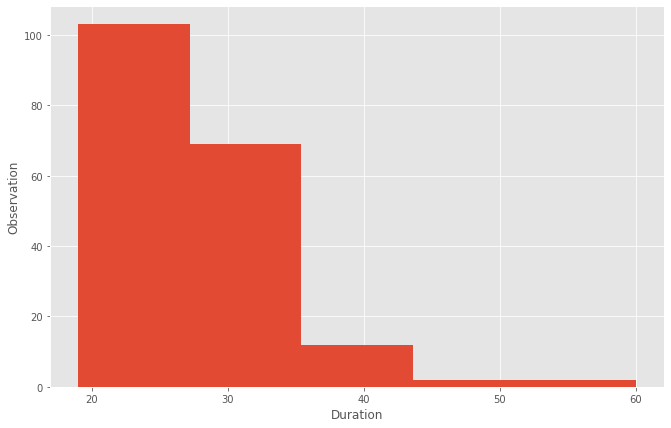

In [16]:
fig, ax = plt.subplots()
res = ax.hist(office_df["Duration"], bins=5)
ax.set_xlabel("Duration")
ax.set_ylabel("Observation")
plt.show()

In view of the histogram we can group the episodes according to **5** criteria. 

* **19** to **27.2** minutes episodes

* episodes over **27.2** to **35.4** minutes

* episodes over **35.5** to **43.6** minutes

* episodes over **43.6** to **51.8** minutes

* episodes over **51.8**

In [17]:
res[1]

array([19. , 27.2, 35.4, 43.6, 51.8, 60. ])

Get the number of views and the average for each of these intervals.

In [18]:
def rangeGetData(column, df):
    return df[column].mean()

mean_viewers_19___27__2 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 19) & (office_df['Duration'] < 27.2)])
mean_ratings_19___27__2 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 19) & (office_df['Duration'] < 27.2)])

mean_viewers_27__2___35__4 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 27.2) & (office_df['Duration'] < 35.4)])
mean_ratings_27__2___35__4 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 27.2) & (office_df['Duration'] < 35.4)])

mean_viewers_35__4___43__6 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 35.4) & (office_df['Duration'] < 43.6)])
mean_ratings_35__4___43__6 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 35.4) & (office_df['Duration'] < 43.6)])

mean_viewers_43__6___51__8 = rangeGetData('Viewership', office_df[(office_df['Duration'] >= 43.6) & (office_df['Duration'] < 51.8)])
mean_ratings_43__6___51__8 = rangeGetData('Ratings', office_df[(office_df['Duration'] >= 43.6) & (office_df['Duration'] < 51.8)])

mean_viewers_51__8 = rangeGetData('Viewership', office_df[office_df['Duration'] >= 51.8])
mean_ratings_51__8 = rangeGetData('Ratings', office_df[office_df['Duration'] >= 51.8])

duration_df = pd.DataFrame(
    data={
        'viewers': [mean_viewers_19___27__2, mean_viewers_27__2___35__4, mean_viewers_35__4___43__6, mean_viewers_43__6___51__8, mean_viewers_51__8],
        'ratings': [mean_ratings_19___27__2, mean_ratings_27__2___35__4, mean_ratings_35__4___43__6, mean_ratings_43__6___51__8, mean_ratings_51__8]
        },
    index = ['19 to 27.2', '27.2 to 35.4', '35.4 to 43.6', '43.6 to 51.8', '51.8 to 60']
)

duration_df

,viewers,ratings
19 to 27.2,6.704175,8.051456
27.2 to 35.4,7.811159,8.336232
35.4 to 43.6,7.384167,8.816667
43.6 to 51.8,7.055000,9.800000
51.8 to 60,15.045000,9.350000


Against all expectations, it seems that viewers enjoy the longer episodes, especially those longer than **51 minutes**. These episodes attracted an average of **15** million views and have a rating of over **9**.

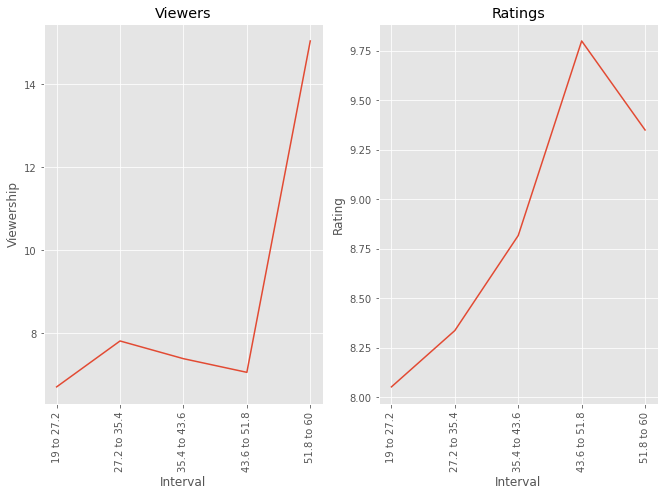

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].plot(duration_df.index, duration_df.viewers)
ax[0].set_title('Viewers')
ax[0].set_xticklabels(duration_df.index, rotation=90)
ax[0].set_ylabel('Viewership')
ax[0].set_xlabel('Interval')
ax[1].plot(duration_df.index, duration_df.ratings)
ax[1].set_xticklabels(duration_df.index, rotation=90)
ax[1].set_ylabel('Rating')
ax[1].set_xlabel('Interval')
ax[1].set_title('Ratings')
plt.show()

## **Reference**

* DataCamp's Unguided Project: "Investigating Netflix Movies and Guest Stars in The Office" [here](https://projects.datacamp.com/projects/1170).

* This article was originally written by **Kossonou Kouamé Maïzan Alain Serge**, as part of the **Data Insight** [data scientist program](https://www.datainsightonline.com/data-scientist-program).